In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
def dataset_reader(datafile):
    
    return pd.read_csv(datafile)

In [4]:
df = dataset_reader('SeoulBikeData.csv')
df.head()

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
#Split Date into day, month and year
df['Date'] = pd.to_datetime(df['Date'])
df['year'], df['month'], df['day'] = df['Date'].dt.year, df['Date'].dt.month , df['Date'].dt.day
df

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30


In [6]:
#Looking for missing values
df.isnull().values.any().sum()

0

<AxesSubplot:ylabel='Rented Bike Count'>

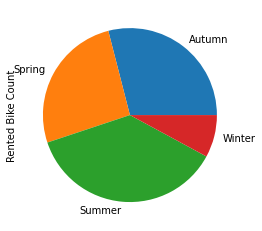

In [7]:
df.groupby('Seasons').sum()['Rented Bike Count'].plot.pie()

In [8]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [9]:
not_functioning_day = df[df['Functioning Day']=='No']
not_functioning_day.head(5)

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day
3144,2018-11-04,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,11,4
3145,2018-11-04,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,11,4
3146,2018-11-04,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,11,4
3147,2018-11-04,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No,2018,11,4
3148,2018-11-04,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No,2018,11,4


In [10]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [11]:
not_functioning_day['Rented Bike Count'].value_counts()

0    295
Name: Rented Bike Count, dtype: int64

In [12]:
#Removing the rows having 'Functioning Day' as 'No"
df.drop(not_functioning_day.index ,inplace=True)


In [13]:
#dropping the 'functioning Day'  column

df = df.drop(columns="Functioning Day")
df.shape

(8465, 16)

In [14]:
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,year,month,day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,2017,1,12
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,2017,1,12
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,2017,1,12
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,2017,1,12
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,2017,1,12


<AxesSubplot:>

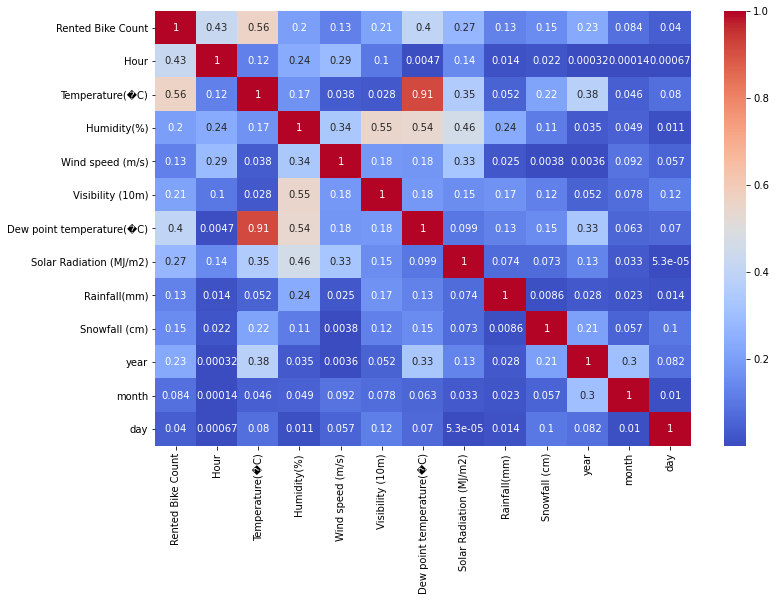

In [15]:
# Correlation Matrix
plt.figure(figsize=(12,8))
correlation= df.corr()
sns.heatmap(abs(correlation),annot=True,cmap='coolwarm')

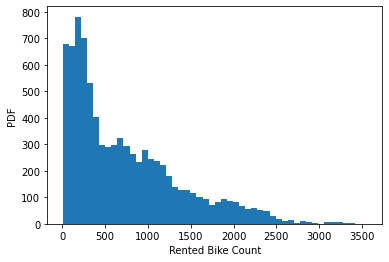

In [58]:
# PDF of Rented Bike Count
import matplotlib.pyplot as plt
p = plt.hist(df['Rented Bike Count'], bins=50)
p = plt.xlabel('Rented Bike Count')
p = plt.ylabel('PDF')
plt.show()

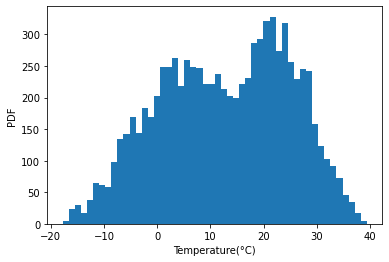

In [59]:
# PDF of Temperature
p = plt.hist(df['Temperature(�C)'], bins=50)
p = plt.xlabel('Temperature(°C)')
p = plt.ylabel('PDF')
plt.show()

<AxesSubplot:xlabel='Hour'>

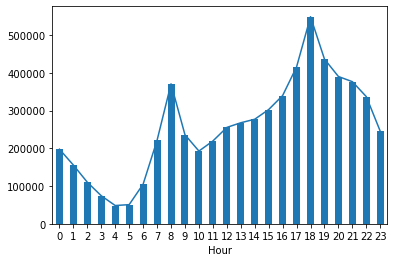

In [18]:
df.groupby('Hour').sum()['Rented Bike Count'].plot.bar()
df.groupby('Hour').sum()['Rented Bike Count'].plot()

In [19]:
#One hot encoding of the 6 features
df = pd.get_dummies(df, columns=["Seasons", "Holiday","Hour","year","month","day"])

In [20]:
df.head(5)

,Date,Rented Bike Count,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,2017-01-12,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2017-01-12,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2017-01-12,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2017-01-12,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2017-01-12,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#dropping date column

df = df.drop(columns="Date")
df.head(5)

,Rented Bike Count,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X = df.drop(columns='Rented Bike Count')
Y = df['Rented Bike Count']

In [23]:
Y.describe

<bound method NDFrame.describe of 0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8465, dtype: int64>

In [25]:
X.head(5)


,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
class LinearRegression:
    
    def __init__(self, X, y, learningRate, tolerance, maxIteration = 50000, error = 'rmse', gd = False, sgd = False, regularisation = False, lamda = 0):
        
        self.X = X
        self.y = y
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        self.error = error 
        self.gd = gd
        self.regularisation = regularisation
        self.lamda = lamda
        self.sgd = sgd
    
    
    def splitTraintest(self):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size = 0.25, random_state = 0)
        
        return X_train, X_test, y_train, y_test
    
    def add_x0(self, X):
        
        return np.column_stack([np.ones([X.shape[0], 1]), X])
    
    def normalize(self, X):
        
        mean = np.mean(X)
        std = np.std(X)
        X_norm = (X - mean) / std
        X_norm = self.add_x0(X_norm)
       
        return X_norm, mean, std
    
    def normalizeTestData (self, X_test , train_mean, train_std):
        
        X_norm = (X_test - train_mean) / train_std
        X_norm = self.add_x0(X_norm)
        
        return X_norm
    
    def rank(self, X, eps = 1e-12):
        u, s, vh = np.linalg.rank(X)
        
        return len([x for x in vh if abs(x) > eps])
    
    def checkMatrix(self, X):
        X_rank = np.linalg.matrix_rank(X)
        
        if X_rank == min(X.shape[0], X.shape[1]):
            self.full_rank = True
            print("data is full rank")
            
        else:
            self.full_rank = False
            print("data is not full rank")
            
    def checkInvertiblity(self, X):
        if X.shape[0] < X.shape[1]:
            self.lowRank = True
            print("Matrix is Low rank")
        else:
            self.lowRank = False
            print("Matrix is not Low rank")
            
    def closedFormSolution(self, X, y):
        
        if not self.regularisation:
            
            theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
            
        else:
            theta = np.linalg.inv(X.T.dot(X) + self.lamda * np.eye(X.shape[1])).dot(X.T).dot(y)
        return theta
    
    def gradientDescent(self, X, y):
        
        errors = []
        
        last_error = float('inf')
        
        for t in tqdm(range(self.maxIteration)):
            
            if not self.regularisation:
                
                self.theta = self.theta - self.learningRate * self.cost_derivative(X, y)
                
            else:
                
                self.theta = self.theta - self.learningRate * (self.cost_derivative(X, y) +  self.lamda * self.theta )
            
            if self.error == 'rmse' :
                
                current_error = self.rmse(X, y)
            else:
                current_error = self.sse(X, y)
                
            error_difference = last_error - current_error
            last_error = current_error
            
            errors.append(current_error)
            
            if -self.tolerance < error_difference < self.tolerance:
                print("The model stopped learning - Converged",error_difference,self.tolerance, last_error, current_error)
                print("final error", self.error, last_error, " iter", t)
                break
                
        print("final error", self.error, last_error)    
        self.plot_errors(errors)
            
        return 
    
    def SGD(self, X, y):
        '''
        step 1: initalise theta 0 
        step 2: for loop to calculate delta G 
        step 3 : for loop to update theta
        '''
        errors = []
        
        last_error = float('inf')
        
        for t in tqdm(range(self.maxIteration)):
            
            indices = np.arange(X.shape[0])
            np.random.shuffle(indices)
#             for i in indices:
#                 x = np.expand_dims(X[i], axis=0)
#                 self.theta = self.theta - self.learningRate * self.cost_derivative(x, y.iloc[i])
            theta_sum = sum([self.learningRate * self.cost_derivative(np.expand_dims(X[i], axis=0), y.iloc[i]) for i in indices] )
#             print(theta_sum)
            self.theta -= theta_sum
            if self.error == 'rmse' :

                current_error = self.rmse(X, y)
            else:
                current_error = self.sse(X, y)

            error_difference = last_error - current_error
            last_error = current_error
            
            errors.append(current_error)
            
            if -self.tolerance < error_difference < self.tolerance:
                print("The model stopped learning - Converged",error_difference,self.tolerance)
                print("final error", self.error, last_error, "iter", t)    
                break
        print("final error", self.error, last_error)    
        self.plot_errors(errors)
        
        
        return 


    
    def predict(self, X):
        
        return X.dot(self.theta)
    
    def sse(self, X, y):
        
        y_hat = self.predict(X)
        
        return ((y_hat - y)**2).sum() 
    
    def rmse(self, X, y):
        
        y_hat = self.predict(X)
        
        return np.sqrt(self.sse(X, y) / X.shape[0])
    
    
    def cost_derivative(self, X, y):
        
        y_hat = self.predict(X)
        grad = (y_hat - y).dot(X)
        return grad
    
    def plot_errors(self, errors):
        
        plt.plot(errors)
        plt.ylabel('Error')
        plt.show()
    
    def run_model(self):
        
        
        self.X_train, self.X_test, self.y_train, self.y_test = self.splitTraintest()
        
        #normalize training data
        self.X_train, self.mean, self.std = self.normalize(self.X_train)
        self.X_test = self.normalizeTestData(self.X_test, self.mean, self.std)
        
        self.checkMatrix(self.X_train)
        self.checkInvertiblity(self.X_train)
        
        if self.full_rank and not self.lowRank and self.X_train.shape[0] <= 10000 and not self.gd and not self.sgd:
            
            self.theta = self.closedFormSolution(self.X_train, self.y_train)
            
            if self.error == 'rmse' :
                
                current_error = self.rmse(self.X_test, self.y_test)
            else:
                current_error = self.sse(self.X_test, self.y_test)
            
        elif self.gd == True:
            
            self.theta = np.ones(self.X_train.shape[1], dtype = np.float64) * 0 
            
            self.gradientDescent(self.X_train, self.y_train)
            
            if self.error == 'rmse' :
                
                current_error = self.rmse(self.X_test, self.y_test)
            else:
                current_error = self.sse(self.X_test, self.y_test)
            
        else:
            
            self.theta = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
            self.SGD(self.X_train, self.y_train)
            
            if self.error == 'rmse' :
                
                current_error = self.rmse(self.X_test, self.y_test)
            else:
                current_error = self.sse(self.X_test, self.y_test)
                
        print("error", self.error, ": ", current_error)
        print(self.theta)
        

  0%|          | 1/50000 [00:00<1:56:46,  7.14it/s]

data is not full rank
Matrix is not Low rank


  1%|▏         | 633/50000 [01:21<1:46:04,  7.76it/s]


The model stopped learning - Converged 0.009997430192981938 0.01
final error rmse 352.7840344599418 iter 633
final error rmse 352.7840344599418


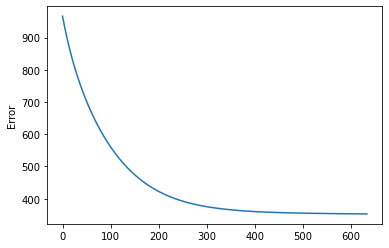

error rmse :  366.7390594861113
[ 7.17674724e+02  1.50757039e+02 -1.35564599e+02  2.80743401e+00
  3.21768625e+01  8.03688360e+01  4.76458407e+01 -7.30766619e+01
  5.25739857e+00  4.77471954e+01  1.27234206e+01  2.47861494e+01
 -8.35908962e+01 -8.29507544e+00  8.29507544e+00 -1.75880106e+01
 -3.71602287e+01 -6.09981624e+01 -7.77853015e+01 -9.10711745e+01
 -9.15903492e+01 -5.30678136e+01  1.39630643e+01  8.45910069e+01
 -3.45971938e+00 -4.42570839e+01 -4.36312856e+01 -3.18248663e+01
 -3.17957820e+01 -3.06896329e+01 -1.38899603e+01  8.79697702e+00
  6.28668295e+01  1.56468315e+02  9.57724729e+01  7.42086041e+01
  7.48585550e+01  5.66966762e+01  4.53414164e+00 -7.69937641e+00
  7.69937641e+00 -2.46560230e+01 -2.85452523e+01 -2.23616589e+01
  3.09011967e+00  3.07461144e+01  5.24795867e+01 -1.28373149e+01
 -1.89651986e+01  2.08398516e+00  2.39293373e+01 -7.42277174e+00
  3.17442582e+00 -1.95809775e+01 -2.69865449e+01 -4.05097965e+01
 -1.49517715e+01  1.78612244e+01  5.19037767e+01  8.383205

In [60]:
'''CLOSED FORM'''

regression = LinearRegression(X,Y, learningRate= 1e-6, tolerance= 0.1e-1, gd = False, sgd = False, regularisation = False, lamda= 0.01)
regression.run_model()

#If CLOSED FORM doesn't exist then it will run SGD

  0%|          | 226/50000 [00:00<00:42, 1173.00it/s]

data is not full rank
Matrix is not Low rank


  3%|▎         | 1544/50000 [00:01<00:31, 1516.80it/s]


The model stopped learning - Converged 0.0009989039328957006 0.001 350.07114662112247 350.07114662112247
final error rmse 350.07114662112247  iter 1544
final error rmse 350.07114662112247


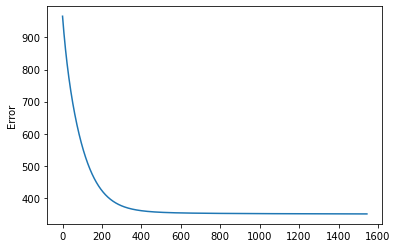

error rmse :  364.24564360118325
[ 7.30513018e+02  1.81509682e+02 -1.68730112e+02 -8.35066009e-01
  1.78188756e+01  1.01197396e+02  5.29259850e+01 -7.06469313e+01
  1.36147539e+01  5.52439373e+01  1.76495188e+01  9.22866099e+00
 -8.00317612e+01 -9.23236897e+00  9.23236897e+00 -1.41725806e+01
 -3.32714172e+01 -5.69746943e+01 -7.40626105e+01 -8.68195864e+01
 -8.74971597e+01 -4.82641871e+01  1.96259634e+01  8.95070626e+01
 -2.72195607e+00 -4.78270035e+01 -4.99471715e+01 -3.92011767e+01
 -4.03969288e+01 -3.93400178e+01 -2.19015304e+01  2.46478383e+00
  5.89119052e+01  1.56063405e+02  9.69384784e+01  7.67988371e+01
  7.80230622e+01  6.00331467e+01  8.00682199e+00 -3.85020938e+00
  3.85020938e+00 -1.49934358e+01 -2.34063642e+01 -2.29871117e+01
 -1.42665528e+00  2.51671522e+01  5.35618948e+01 -1.83003344e+01
 -1.89664130e+01 -2.20885910e+00  2.36037278e+01 -7.42350766e+00
  7.86375332e+00 -7.56972537e+00 -1.43515310e+01 -3.75188574e+01
 -1.38679755e+01  1.46207413e+01  5.15273984e+01  1.10082

In [61]:
'''Gradient Descent'''

regression = LinearRegression(X, Y, learningRate= 1e-6, tolerance= 0.1e-2,
                              gd = True, sgd = False, regularisation = True, lamda= 0.1)
regression.run_model()